In [6]:
using PyCall
using PyPlot

In [7]:
pyabf=pyimport("pyabf")

PyObject <module 'pyabf' from '/home/karel/.local/lib64/python3.6/site-packages/pyabf/__init__.py'>

In [9]:
arx=pyabf.ABF("../ABFiles/Eduardo/CarbacholCA3.abf") # sintaxis similar a PyPlot.jl

PyObject ABFcore(abf="/home/karel/RGutWork/ABFiles/Eduardo/CarbacholCA3.abf", loadData=True)

In [10]:
canales=arx.channelCount

1

In [11]:
llaves=keys(arx)

101-element Array{Symbol,1}:
 :__class__        
 :__delattr__      
 :__dict__         
 :__dir__          
 :__doc__          
 :__eq__           
 :__format__       
 :__ge__           
 :__getattribute__ 
 :__gt__           
 :__hash__         
 :__init__         
 :__init_subclass__
 ⋮                 
 :sweepPointCount  
 :sweepTimesMin    
 :sweepTimesSec    
 :sweepUnitsC      
 :sweepUnitsX      
 :sweepUnitsY      
 :sweepX           
 :sweepY           
 :tagComments      
 :tagSweeps        
 :tagTimesMin      
 :tagTimesSec      

In [12]:
#este diccionario parece tener cosas interesantes
for i in keys(arx[:__dict__])
    print(i," , ")
end 

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[12]:1
└ @ Core ./In[12]:1


sweepX , _cacheStimulusFiles , dacUnits , dacNames , data , dataSecPerPoint , creatorVersion , sweepUnitsC , _fileSize , dataPointsPerMs , abfFilePath , abfVersion , tagSweeps , _dtype , abfDateTime , sweepUnitsX , holdingCommand , sweepPointCount , _sweepBaselinePoints , fileGUID , sweepIntervalSec , sweepLabelY , dataPointByteSize , sweepY , adcNames , sweepCount , _preLoadData , dataPointCount , _dataOffset , abfID , abfDateTimeString , adcUnits , dataRate , tagTimesSec , protocolPath , sweepChannel , stimulusByChannel , _headerV1 , sweepLabelC , sweepUnitsY , sweepNumber , channelCount , channelList , _nDataFormat , creatorVersionString , sweepLengthSec , tagComments , _dataGain , protocol , abfFileComment , dataByteStart , dataLengthSec , sweepLabelX , sweepList , tagTimesMin , dataLengthMin , sweepEpochs , stimulusFileFolder , abfVersionString , 

In [15]:
dictionario=arx.__dict__

Dict{Any,Any} with 59 entries:
  "sweepX"               => [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.0…
  "_cacheStimulusFiles"  => true
  "dacUnits"             => ["?"]
  "dacNames"             => ["?"]
  "data"                 => Float32[0.0078125 0.0 … -2.25 -2.125]
  "dataSecPerPoint"      => 0.001
  "creatorVersion"       => Dict{Any,Any}("major"=>0,"bugfix"=>0,"build"=>0,"mi…
  "sweepUnitsC"          => "?"
  "_fileSize"            => 194744
  "dataPointsPerMs"      => 1
  "abfFilePath"          => "/home/karel/RGutWork/ABFiles/Eduardo/CarbacholCA3.…
  "abfVersion"           => Dict{Any,Any}("major"=>1,"bugfix"=>4,"build"=>0,"mi…
  "tagSweeps"            => Any[]
  "_dtype"               => PyObject <class 'numpy.float32'>
  "abfDateTime"          => 2019-03-20T14:07:30
  "sweepUnitsX"          => "sec"
  "holdingCommand"       => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, …
  "sweepPointCount"      => 2048
  "_sweepBaselinePoints" => false
  "fileGUID"          

In [16]:
dictionario["sweepLabelX"]

"time (seconds)"

In [18]:
arx.sweepLabelX  #esto parece ser mas simple y nos permitira ordenar mas comodamente los hdf5

"time (seconds)"

In [19]:
# Al parecer son equivalentes, aunque el __dict__ parece solo tener objetos con data 
# mientras que el diccionario original tiene mucho mnas cosas (una copia de si mismo al parecer)
arx[:sweepLabelX] ==arx[:__dict__]["sweepLabelX"]

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[19]:1
└ @ Core In[19]:1
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[19]:1
└ @ Core In[19]:1


true

In [20]:
for l in llaves
    print(l, ", ")
end

__class__, __delattr__, __dict__, __dir__, __doc__, __eq__, __format__, __ge__, __getattribute__, __gt__, __hash__, __init__, __init_subclass__, __le__, __lt__, __module__, __ne__, __new__, __reduce__, __reduce_ex__, __repr__, __setattr__, __sizeof__, __str__, __subclasshook__, __weakref__, _cacheStimulusFiles, _dataGain, _dataOffset, _dtype, _fileSize, _headerV1, _ide_helper, _loadAndScaleData, _makeAdditionalVariables, _nDataFormat, _preLoadData, _readHeadersV1, _readHeadersV2, _sweepBaselinePoints, abfDateTime, abfDateTimeString, abfFileComment, abfFilePath, abfID, abfVersion, abfVersionString, adcNames, adcUnits, channelCount, channelList, creatorVersion, creatorVersionString, dacNames, dacUnits, data, dataByteStart, dataLengthMin, dataLengthSec, dataPointByteSize, dataPointCount, dataPointsPerMs, dataRate, dataSecPerPoint, fileGUID, headerHTML, headerLaunch, headerMarkdown, headerText, holdingCommand, launchInClampFit, protocol, protocolPath, saveABF1, setSweep, stimulusByChannel,

In [23]:
arx.setSweep(0)
arx.sweepCount

23

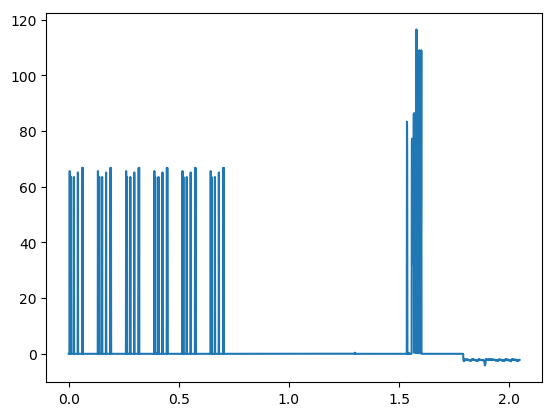

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[22]:1
└ @ Core In[22]:1
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[22]:2
└ @ Core In[22]:2


1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc55aee97b8>

In [22]:
tts=arx[:sweepX]
vvs=arx[:sweepY]
plot(tts,vvs)

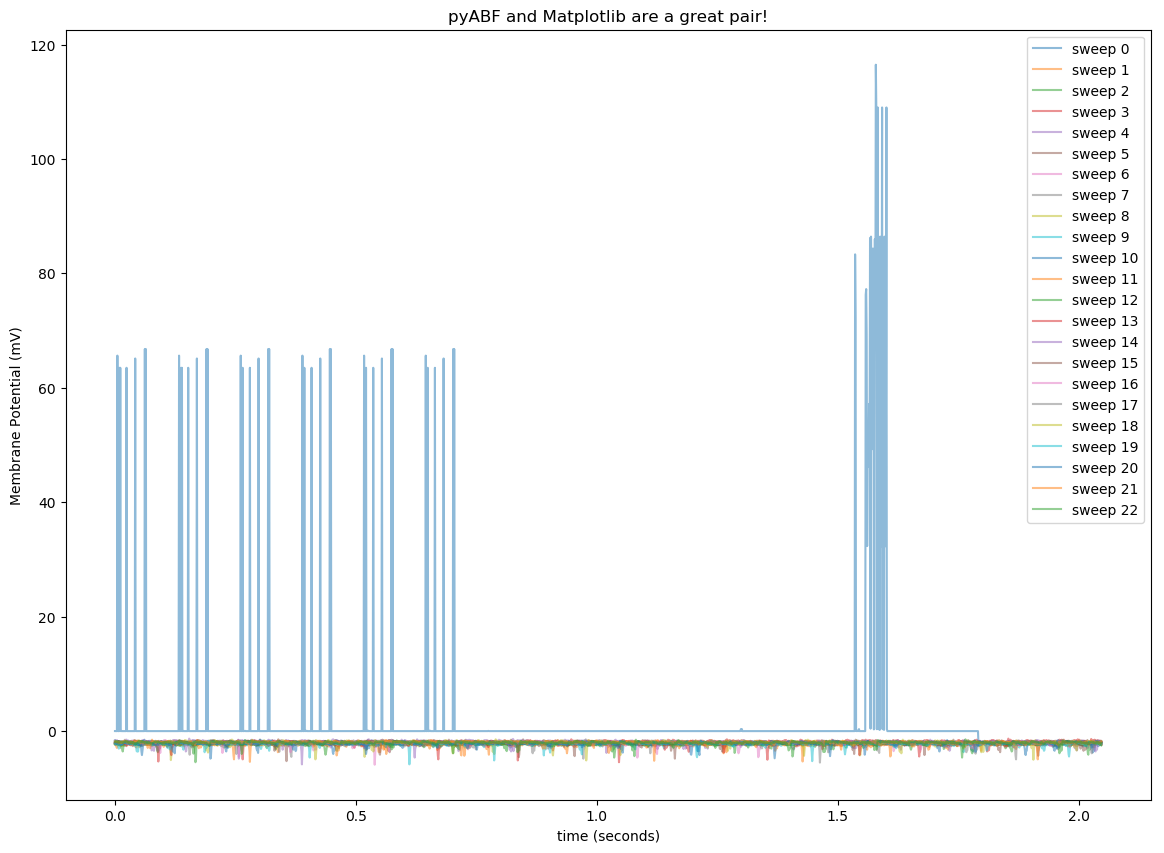

PyObject Text(0.5,1,'pyABF and Matplotlib are a great pair!')

In [43]:
f=figure(figsize=(14,10))

for k in 0:(arx[:sweepCount]-1)
    arx[:setSweep](k)
    tts=arx[:sweepX]
    vvs=arx[:sweepY]
    plot(tts,vvs,alpha=.5,label="sweep $k")
end
legend()
ylabel(arx[:sweepLabelY])
xlabel(arx[:sweepLabelX])
title("pyABF and Matplotlib are a great pair!")


In [24]:
arx.sweepList

23-element Array{Int64,1}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20
 21
 22

In [25]:
arx.sweepNumber

0

In [34]:
arx.dataRate

1000